In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/processed/filtered_data.csv")

Sklearn Pipeline creation
1. Feature engineering
2. Encodings

P.s Moved to application due to save/load issue of custom sklearn pipelines from Jupyter Notebook to .py script

In [8]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # adjust if needed
from app.core.preprocessing_architecture import TreeFeatureEngineer, ColumnTransformerToDataFrame, preprocessor

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
transform_pipeline = Pipeline([
    ("feature_engineer", TreeFeatureEngineer()),
    ("encode_scale", ColumnTransformerToDataFrame(preprocessor))
])

In [14]:
X = df.drop(['health'], axis=1)
y = df['health']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
# 3) Transform training data -> X_train_transformed
X_train_transformed = transform_pipeline.fit_transform(X_train)
X_test_transformed = transform_pipeline.transform(X_test)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

y_train_transformed = le.fit_transform(y_train)
y_test_transformed = le.transform(y_test)

In [18]:
import joblib

joblib.dump(transform_pipeline, '../models/transform_pipeline.pkl')
joblib.dump(le, '../models/target_label_encoder.pkl')


['../models/target_label_encoder.pkl']

Explanation of models, optimizers, etc can be found in trainer.py

Using device: cpu
Training set size: 521732
Testing set size: 130434
Creating model...
TreeClassifier(
  (model): Sequential(
    (0): Linear(in_features=27, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=256, out_features=128, bias=True)
    (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=64, out_features=3, bias=True)
  )
)
Training model...
Epoch [1/30], Train Loss: 0.4690, Train Acc: 0.4259, Val Loss: 0.4715, Val Acc: 0.5177
Epoch [2/30], Train Loss: 0.4546, Train Acc: 0.4455, Val Loss: 0.4355, Val Acc: 0.5

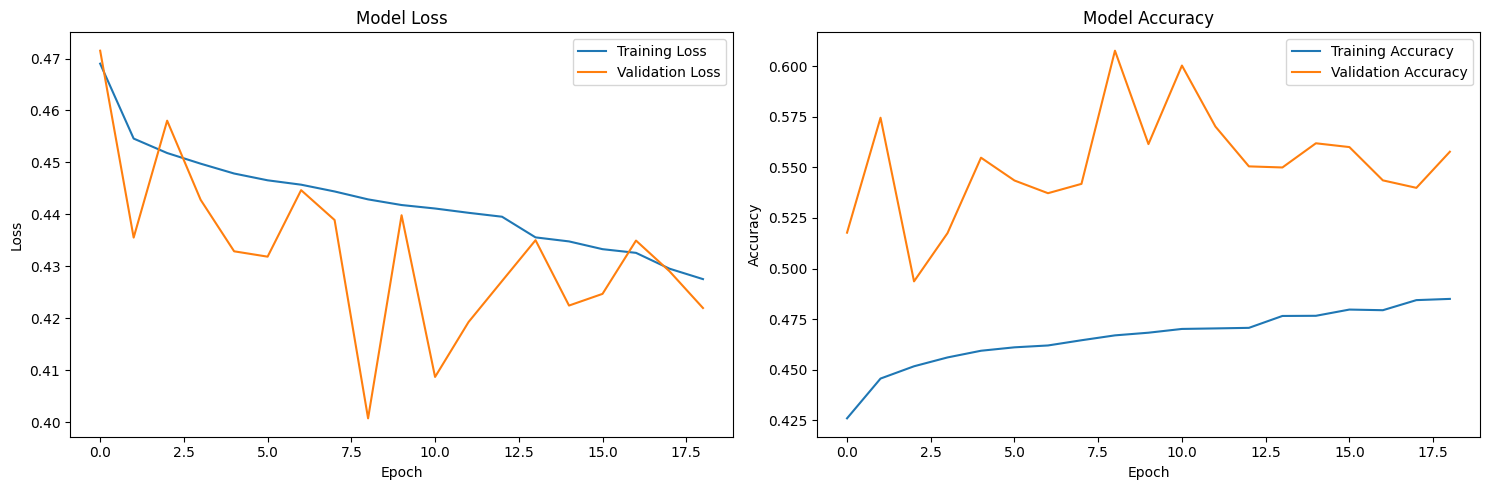

Making predictions...

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.24      0.23     19301
           1       0.87      0.68      0.76    105770
           2       0.10      0.46      0.16      5363

    accuracy                           0.61    130434
   macro avg       0.39      0.46      0.38    130434
weighted avg       0.74      0.61      0.66    130434

Plotting confusion matrix...


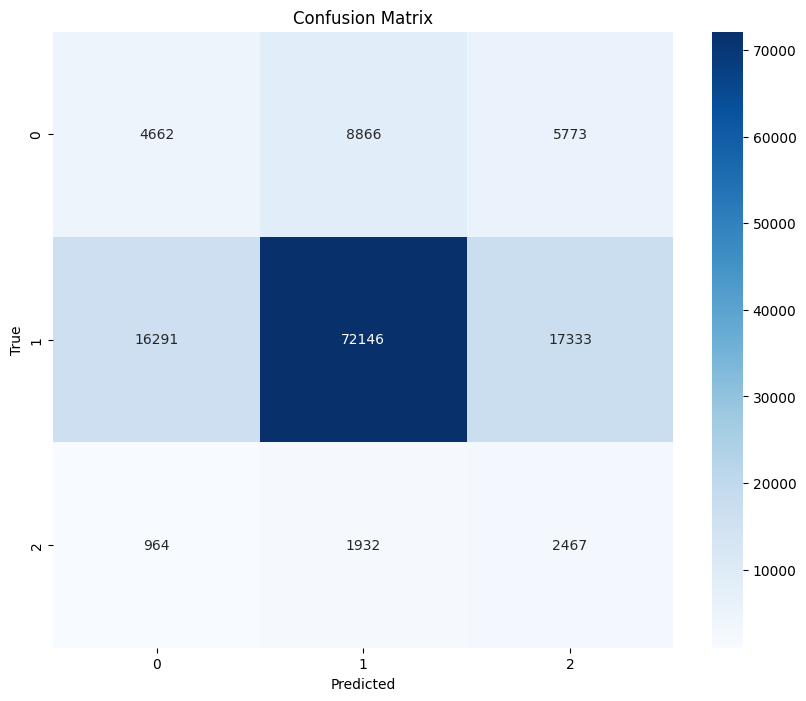


Training completed successfully!


In [11]:
from training_utils.trainer import train_tree_classifier


train_tree_classifier(X_train_transformed, y_train_transformed, X_test_transformed, y_test_transformed)